In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


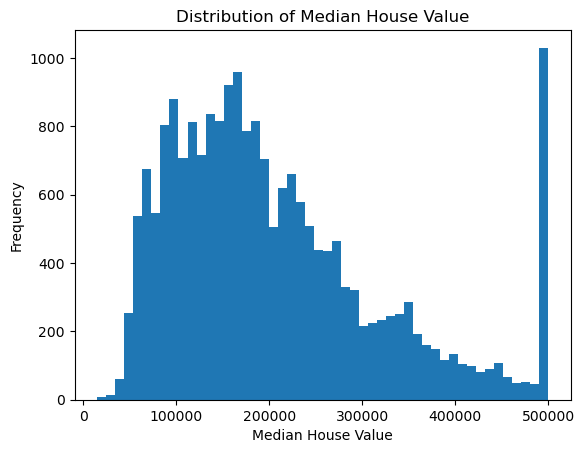

In [5]:
import matplotlib.pyplot as plt
plt.hist(df['median_house_value'], bins=50)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [7]:
df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
# Filter records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
df_filtered = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [9]:
# Select the desired columns
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]
df_filtered = df_filtered[selected_columns]

In [10]:
columns_missing_values = df.columns[df.isnull().any()]

In [11]:
columns_missing_values

Index(['total_bedrooms'], dtype='object')

In [12]:
df['population'].median()

1166.0

In [13]:
df_shuffled = df_filtered.sample(frac=1, random_state=42)


In [14]:
df_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
6651,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
17810,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
6850,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
2161,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [15]:
train_size = 0.6
val_size = 0.2
test_size = 0.2

In [16]:
train, val_test = train_test_split(df_shuffled, test_size=(val_size + test_size), random_state=42)
val, test = train_test_split(val_test, test_size=(test_size / (val_size + test_size)), random_state=42)


In [17]:
train['median_house_value'] = np.log1p(train['median_house_value'])
val['median_house_value'] = np.log1p(val['median_house_value'])
test['median_house_value'] = np.log1p(test['median_house_value'])

In [18]:
train_zero = train.fillna(0)
val_zero = val.fillna(0)

In [19]:
mean_total_bedrooms = train['total_bedrooms'].mean()
train_mean = train.fillna({'total_bedrooms': mean_total_bedrooms})
val_mean = val.fillna({'total_bedrooms': mean_total_bedrooms})

# The function to train a linear regression model and calculate RMSE
def train_linear_regression(train_df, val_df):
    X_train = train_df.drop(columns=['median_house_value'])
    y_train = train_df['median_house_value']
    
    X_val = val_df.drop(columns=['median_house_value'])
    y_val = val_df['median_house_value']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

# Evaluating the models with and without missing value handling
rmse_zero = train_linear_regression(train_zero, val_zero)
rmse_mean = train_linear_regression(train_mean, val_mean)

# Comparing the RMSE scores
result = ""
if rmse_zero < rmse_mean:
    result = "With 0"
elif rmse_mean < rmse_zero:
    result = "With mean"
else:
    result = "Both are equally good"

print("RMSE with 0:", round(rmse_zero, 2))
print("RMSE with mean:", round(rmse_mean, 2))
print("The better RMSE option is the one :", result)

RMSE with 0: 0.35
RMSE with mean: 0.35
The better RMSE option is the one : With mean


In [20]:
from sklearn.linear_model import Ridge

# Define a list of regularization parameters
regularization_params = [0, 1e-6, 1e-4, 1e-3, 1e-2, 0.1, 1, 5, 10]

# Function to train a Ridge regression model and calculate RMSE
def train_ridge_regression(train_df, val_df, alpha):
    X_train = train_df.drop(columns=['median_house_value'])
    y_train = train_df['median_house_value']
    
    X_val = val_df.drop(columns=['median_house_value'])
    y_val = val_df['median_house_value']
    
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

# Train Ridge regression models with different regularization parameters
rmse_scores = []
for alpha in regularization_params:
    rmse = train_ridge_regression(train_zero, val_zero, alpha)
    rmse_scores.append((alpha, rmse))

# Find the best regularization parameter (smallest RMSE)
best_alpha = min(rmse_scores, key=lambda x: x[1])[0]

# Print RMSE scores and the best regularization parameter
for alpha, rmse in rmse_scores:
    print(f"RMSE with alpha={alpha}: {round(rmse, 2)}")

print("Best alpha:", best_alpha)


RMSE with alpha=0: 0.35
RMSE with alpha=1e-06: 0.35
RMSE with alpha=0.0001: 0.35
RMSE with alpha=0.001: 0.35
RMSE with alpha=0.01: 0.35
RMSE with alpha=0.1: 0.35
RMSE with alpha=1: 0.35
RMSE with alpha=5: 0.35
RMSE with alpha=10: 0.35
Best alpha: 0


In [21]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values:
    # Split the data with the current seed
    train, val_test = train_test_split(df_shuffled, test_size=(val_size + test_size), random_state=seed)
    val, test = train_test_split(val_test, test_size=(test_size / (val_size + test_size)), random_state=seed)

    # Apply log transformation to 'median_house_value'
    train['median_house_value'] = np.log1p(train['median_house_value'])
    val['median_house_value'] = np.log1p(val['median_house_value'])
    test['median_house_value'] = np.log1p(test['median_house_value'])

    # Fill missing values with 0
    train_zero = train.fillna(0)
    val_zero = val.fillna(0)

    # Train a linear regression model without regularization
    rmse = train_linear_regression(train_zero, val_zero)
    rmse_scores.append(rmse)

# Calculate the standard deviation of RMSE scores
std_deviation = np.std(rmse_scores)

# Round the result to 3 decimal digits
std_deviation = round(std_deviation, 3)

print("Standard Deviation of RMSE Scores:", std_deviation)


Standard Deviation of RMSE Scores: 0.006


In [22]:
seed = 9

# Split the data with the specified seed (60%/20%/20% distribution)
train, val_test = train_test_split(df_shuffled, test_size=(val_size + test_size), random_state=seed)
val, test = train_test_split(val_test, test_size=(test_size / (val_size + test_size)), random_state=seed)

# Apply log transformation to 'median_house_value'
train['median_house_value'] = np.log1p(train['median_house_value'])
val['median_house_value'] = np.log1p(val['median_house_value'])
test['median_house_value'] = np.log1p(test['median_house_value'])

# Fill missing values with 0
train_zero = train.fillna(0)
val_zero = val.fillna(0)

# Combine train and validation datasets
train_val_zero = pd.concat([train_zero, val_zero])

# Train a Ridge regression model with r=0.001
alpha = 0.001
X_train_val = train_val_zero.drop(columns=['median_house_value'])
y_train_val = train_val_zero['median_house_value']

model = Ridge(alpha=alpha, random_state=seed)
model.fit(X_train_val, y_train_val)

# Prepare the test dataset
test_zero = test.fillna(0)
X_test = test_zero.drop(columns=['median_house_value'])
y_test = test_zero['median_house_value']

# Make predictions on the test dataset
y_pred_test = model.predict(X_test)

# Calculate RMSE on the test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print the RMSE on the test dataset
print("RMSE on the test dataset:", round(rmse_test, 2))

RMSE on the test dataset: 0.34
